# Normal Equation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Create data set.
X, y = make_regression(n_samples=100, n_features=1,
					n_informative=1, noise=10, random_state=10)


In [14]:
X

array([[-1.13660221],
       [-1.41855603],
       [ 1.74481415],
       [-0.23218226],
       [-0.48933722],
       [ 0.2890942 ],
       [ 1.3315865 ],
       [-0.52929608],
       [ 1.12878515],
       [-0.17460021],
       [ 1.02827408],
       [-0.93943336],
       [ 0.66023155],
       [ 0.24454398],
       [-0.69781003],
       [ 0.98907246],
       [-1.85618548],
       [-0.5017289 ],
       [ 0.40020999],
       [ 1.12369125],
       [ 0.82699862],
       [-0.21578989],
       [ 1.39799638],
       [ 1.20303737],
       [-0.02590534],
       [-1.04513254],
       [ 0.70816002],
       [ 0.71527897],
       [ 0.31216994],
       [-0.08112218],
       [-1.95451212],
       [ 0.26551159],
       [ 0.13513688],
       [-1.99439377],
       [-0.12190569],
       [-2.13171211],
       [ 1.30847308],
       [-0.7319695 ],
       [-0.36249918],
       [-0.80459114],
       [-0.00838385],
       [ 0.31475378],
       [ 1.98508459],
       [-0.11227247],
       [ 0.22863013],
       [ 0

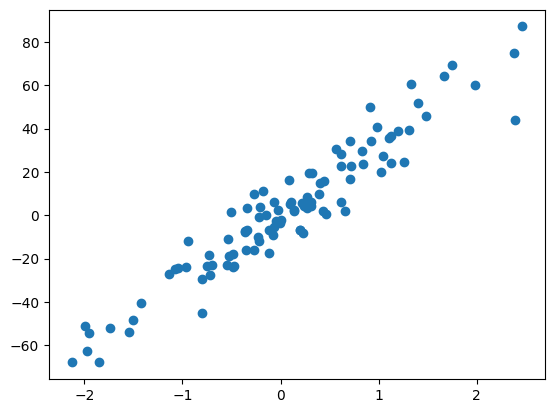

In [11]:
plt.scatter(X,y)
plt.show()

In [13]:
X_transpose = np.transpose(X)
X_transpose

array([[-1.13660221, -1.41855603,  1.74481415, -0.23218226, -0.48933722,
         0.2890942 ,  1.3315865 , -0.52929608,  1.12878515, -0.17460021,
         1.02827408, -0.93943336,  0.66023155,  0.24454398, -0.69781003,
         0.98907246, -1.85618548, -0.5017289 ,  0.40020999,  1.12369125,
         0.82699862, -0.21578989,  1.39799638,  1.20303737, -0.02590534,
        -1.04513254,  0.70816002,  0.71527897,  0.31216994, -0.08112218,
        -1.95451212,  0.26551159,  0.13513688, -1.99439377, -0.12190569,
        -2.13171211,  1.30847308, -0.7319695 , -0.36249918, -0.80459114,
        -0.00838385,  0.31475378,  1.98508459, -0.11227247,  0.22863013,
         0.26607016,  0.62133597,  0.91826915,  0.10854853,  0.08958761,
         0.39334122,  0.00429143,  0.43302619, -0.36218045,  0.09914922,
        -0.35087189,  1.484537  ,  0.1327083 ,  0.19501328,  0.84222474,
         0.31935642,  0.71195902, -0.75389296, -0.06191203,  0.61320418,
        -0.72008556,  0.62060066, -0.04883051,  0.4

In [16]:
X_transpose_X = np.dot(X_transpose, X)
X_transpose_X

array([[94.14723566]])

In [17]:
X_transpose_y = np.dot(X_transpose, y)
X_transpose_y

array([2890.65017948])

In [12]:

def linear_regression_normal_equation(X, y):
	X_transpose = np.transpose(X)
	X_transpose_X = np.dot(X_transpose, X)
	X_transpose_y = np.dot(X_transpose, y)
	
	try:
		theta = np.linalg.solve(X_transpose_X, X_transpose_y)
		return theta
	except np.linalg.LinAlgError:
		return None


In [18]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept

array([[ 1.        , -1.13660221],
       [ 1.        , -1.41855603],
       [ 1.        ,  1.74481415],
       [ 1.        , -0.23218226],
       [ 1.        , -0.48933722],
       [ 1.        ,  0.2890942 ],
       [ 1.        ,  1.3315865 ],
       [ 1.        , -0.52929608],
       [ 1.        ,  1.12878515],
       [ 1.        , -0.17460021],
       [ 1.        ,  1.02827408],
       [ 1.        , -0.93943336],
       [ 1.        ,  0.66023155],
       [ 1.        ,  0.24454398],
       [ 1.        , -0.69781003],
       [ 1.        ,  0.98907246],
       [ 1.        , -1.85618548],
       [ 1.        , -0.5017289 ],
       [ 1.        ,  0.40020999],
       [ 1.        ,  1.12369125],
       [ 1.        ,  0.82699862],
       [ 1.        , -0.21578989],
       [ 1.        ,  1.39799638],
       [ 1.        ,  1.20303737],
       [ 1.        , -0.02590534],
       [ 1.        , -1.04513254],
       [ 1.        ,  0.70816002],
       [ 1.        ,  0.71527897],
       [ 1.        ,

In [19]:


# Add a column of ones to X for the intercept term
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

theta = linear_regression_normal_equation(X_with_intercept, y)
if theta is not None:
	print(theta)
else:
	print("Unable to compute theta. The matrix X_transpose_X is singular.")


[ 0.52804151 30.65896337]


# LOGISTIC REGRESSION

## reference from kaggle

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))


In [30]:
def z(theta,x):
    assert theta.shape[1]==1
    assert theta.shape[0]==x.shape[1]
    return np.dot(x,theta)

In [21]:
def hypothesis(theta,x):
    return sigmoid(z(theta,x))

In [31]:
def cost(theta,x,y):
    assert x.shape[1]==theta.shape[0]
    assert x.shape[0]==y.shape[0]
    assert y.shape[1]==1
    h = hypothesis(theta,x)
    one_case = np.matmul(-y.T,np.log(h))
    zero_case = np.matmul(-(1-y).T,np.log(1-h))
    return (one_case+zero_case)/len(x)

In [32]:
def gradient_descent(theta,x,y,learning_rate,regularization=0):
    regularization = theta * regularization
    error = hypothesis(theta,x)-y
    n=(learning_rate/len(x))*(np.matmul(x.T,error)+regularization)
    return theta-n

In [43]:
def minimize(theta,x,y,iterations,learning_rate,regularization=0):
    costs=[]
    for _ in range(iterations):
        theta=gradient_descent(theta,x,y,learning_rate,regularization)
        costs.append(cost(theta,x,y)[0][0])
    return theta,costs

### import data

In [8]:
mushroom_data=pd.read_csv('./mushrooms.csv')

In [9]:
mushroom_x = pd.get_dummies(mushroom_data.drop('class', axis=1))
mushroom_x['bias'] = 1
mushroom_x = mushroom_x.values
mushroom_y = (np.atleast_2d(mushroom_data['class']).T == 'p').astype(int)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(mushroom_x,mushroom_y,train_size=0.85,test_size=0.15)
candidate = np.atleast_2d([ np.random.uniform(-1, 1, 118) ]).T
candidate

array([[ 0.78951141],
       [-0.84503858],
       [-0.65323662],
       [ 0.10217579],
       [ 0.14535867],
       [ 0.56036969],
       [ 0.40746492],
       [-0.68147386],
       [ 0.95196635],
       [ 0.72275468],
       [-0.5095238 ],
       [-0.32226004],
       [-0.29706977],
       [ 0.02875767],
       [ 0.31880826],
       [ 0.75066119],
       [-0.99745402],
       [ 0.86211815],
       [ 0.14833503],
       [ 0.88649024],
       [ 0.24649651],
       [ 0.37102089],
       [-0.75963801],
       [-0.64985168],
       [-0.60864518],
       [-0.33101166],
       [-0.10858775],
       [-0.59473527],
       [ 0.27349406],
       [ 0.64753501],
       [-0.08797622],
       [ 0.53330438],
       [ 0.04382849],
       [ 0.21789972],
       [-0.21293917],
       [-0.85551076],
       [-0.77010566],
       [ 0.27073325],
       [ 0.01242199],
       [-0.83112974],
       [ 0.89030011],
       [ 0.24495304],
       [-0.53880483],
       [ 0.43876838],
       [-0.30997161],
       [-0

In [44]:
theta, costs = minimize(candidate, x_train, y_train, 1200, 1.2, 0.5)

## reference from yoututbe (https://www.youtube.com/watch?v=nzNp05AyBM8&t=77s)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
X_train = pd.read_csv("./Henry/Coding-Lane-Assets/Logistic Regression in Python from Scratch/train_X.csv")
Y_train = pd.read_csv("./Henry/Coding-Lane-Assets/Logistic Regression in Python from Scratch/train_Y.csv")

X_test = pd.read_csv("./Henry/Coding-Lane-Assets/Logistic Regression in Python from Scratch/test_X.csv")
Y_test = pd.read_csv("./Henry/Coding-Lane-Assets/Logistic Regression in Python from Scratch/test_Y.csv")

In [49]:
X_train=X_train.drop('Id',axis=1)
Y_train=Y_train.drop('Id',axis=1)
X_test=X_test.drop('Id',axis=1)
Y_test=Y_test.drop('Id',axis=1)

In [47]:
X_train = X_train.values
Y_train =Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [31]:
X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])
X_test  = X_test.T
Y_test  = Y_test.reshape(1,X_test.shape[1])

In [32]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)

X_train shape:  (7, 891)
Y_train shape:  (1, 891)


In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [34]:
def model(X,Y,learning_rate,iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B=0

    cost_list=[]
    
    for i in range(iterations):
        Z = np.dot(W.T,X)+B
        A = sigmoid(Z)

        cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

        dW = (1/m)*np.dot(A-Y,X.T)
        dB= (1/m)*np.sum(A-Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        cost_list.append(cost)

        if(i%(iterations/10)==1):
            print("cost after", i, "iterations is: ",cost)
    return W,B,cost_list
         

In [35]:
iterations = 1000
learning_rate = 0.0005
W,B, cost_list = model(X_train, Y_train, learning_rate=learning_rate,iterations=iterations)

cost after 1 iterations is:  0.6833932086482432
cost after 101 iterations is:  0.6266189900269277
cost after 201 iterations is:  0.6248443806793026
cost after 301 iterations is:  0.6231390479905539
cost after 401 iterations is:  0.6214980831852085
cost after 501 iterations is:  0.619917834450689
cost after 601 iterations is:  0.6183948450273404
cost after 701 iterations is:  0.6169258463124712
cost after 801 iterations is:  0.6155077506832919
cost after 901 iterations is:  0.6141376441088527


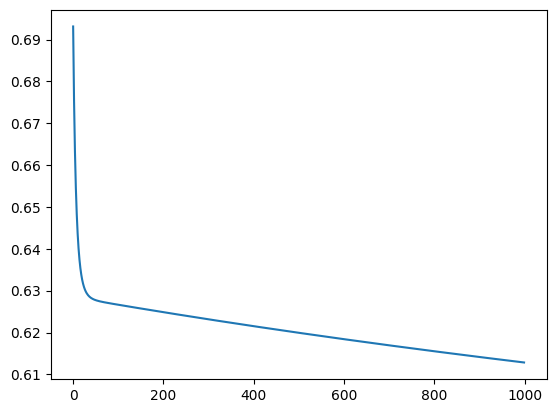

In [39]:
plt.plot(np.arange(iterations),cost_list)
plt.show()

# GRADIENT DESCENT (https://www.kaggle.com/code/chayan8/gradient-descent-in-pure-numpy)


In [50]:
import numpy as np
x=np.array([1,3,5])
y=np.array([5,12,18])


In [51]:
w1 =((x*y).mean() - x.mean()*y.mean())/((x**2).mean() - (x.mean())**2)
w1

3.25

In [55]:
w0 = y.mean() - w1*x.mean()

In [57]:
# Step 1: Initializing weights to 0, 
# a (learning parameter) to 0.04, 
# and an array MSE for storing MSE at each iteration

W0_new = 0
W1_new = 0
a = 0.04
MSE = np.array([])

In [63]:
for iteration in range(1,11):
    
    y_pred = np.array([])                        # The Predicted target
    error = np.array([])                         # The errors per iterations : (Ŷ-Y)
    error_x = np.array([])                       # The (Ŷ-Y).X term for update rule
    
    W0 = W0_new                                  # Step 1 and 4: Initializing new weights/Assigning the updated weights
    W1 = W1_new

    # Step 2:    
    
    for i in x:                                  # Iterating X row by row for calculating the Ŷ and error
        y_pred = np.append(y_pred,(W0 + W1*i))   # Ŷ = W0 + W*X 


    error = np.append(error,y_pred-y)            # Calculating the (Ŷ-Y) error for each sample 
    error_x = np.append(error_x, error*x)        # Calculating the (Ŷ-Y).X term for update rule
    MSE_val = (error**2).mean()                  # Calculating the MSE  (Ŷ-Y)^2
    MSE = np.append(MSE,MSE_val)
    
    # Step 3:   

    W0_new = W0 - a*np.sum(error)               # Calculating the updated W0   
    W1_new = W1 - a*np.sum(error_x)             # Calculating the updated W1

In [64]:
print('W0 by gradient descent= ',W0_new)
print('W1 by gradient descent= ',W1_new)


W0 by gradient descent=  1.1474479185822484
W1 by gradient descent=  3.448230314024035


In [65]:
print('y_pred: ',y_pred)
print('error:  ',error)

y_pred:  [ 4.5923844  11.51794949 18.44351457]
error:   [-0.4076156  -0.48205051  0.44351457]


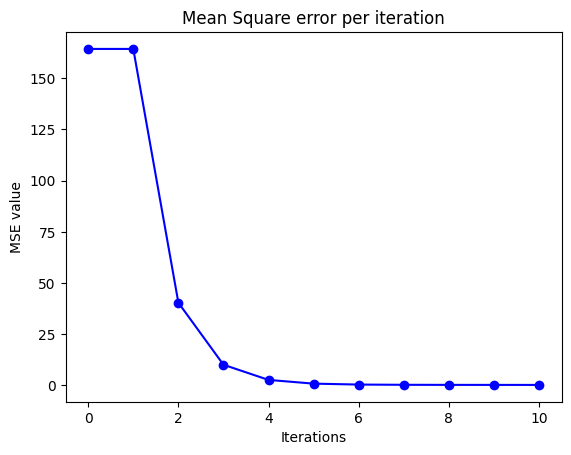

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(MSE,'b-o')
plt.title('Mean Square error per iteration')
plt.xlabel('Iterations')
plt.ylabel('MSE value')
plt.show()

# SOFTMAX REGRESSION


## MNIST DATASET

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


In [2]:
mnist = fetch_openml('mnist_784', version = 1,parser='auto')

(-0.5, 27.5, 27.5, -0.5)

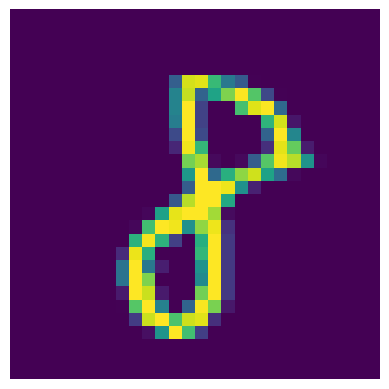

In [3]:
shuffle_index = np.random.permutation(70000)
X=mnist['data'].values[shuffle_index]/255
Y= mnist["target"][shuffle_index]

x_train,x_test,y_train,y_test=X[:60000],X[60000:],Y[:60000],Y[60000:]
digit = x_train[2500]
image = digit.reshape(28,28)
plt.imshow(image)
plt.axis('off')

In [4]:
def augment_feature_vector(X):
    return np.hstack((np.ones([len(X),1]),X))

In [5]:
def naive_compute_probabilities(X,theta):
    #Arguments:
    #X is a (nxd) matrix (numpy array)
    #theta is a kxd matrix

    #Returns:
    #H is (kxn) matrix (numpy array) such that each column of H represents that the ith data point takes on each label
    #data point takes on each label

    #constructs the skeleton of the output matrix
    k=theta.shape[0]
    n=X.shape[0]
    H=np.zeros([k,n])

    #loops over all the data points
    for i in range(n):
        dpoint=X[i]
        #constructing a vector that we can take maximum of to obtain constant c
        c_vector = np.zeros(k)
        for j in range(k):
            c_vector[j] = (np.dot(theta[j],dpoint))
            c = np.amax(c_vector)
        summation =0

        for j in range(k):
            exponent = np.dot(theta[j],dpoint)-c
            summation += np.exp(exponent)
            H[j][i] = np.exp(exponent)
        H[:,i] = H[:,i]/summation
        return H;
    return H

In [6]:
import time
 #theta initialized to zero
theta = np.zeros([10, x_train.shape[1]])

start = time.time()
probs = naive_compute_probabilities(x_train, theta)
end = time.time()
end - start

0.0

In [7]:
def vectorized_compute_probabilities(X,theta):
    #Arguements:
    #X is (nxd) matrix (numpy array)
    #theta is a kxd matrix

    #Returns:
    #H - a (kxn) matrix (numpy array) such that each column of H represents the probabilities that the ith 
    #data point takes on each label

    theta_XT = np.matmul(theta, np.transpose(X))
    #taking a columnwise max:
    c = np.amax(theta_XT,axis=0)
    #elementwise exponentation of theta_XT:
    exp_matrix = np.exp(theta_XT-c)
    #computing the normalization factors for each column of H:
    sum_vector = np.sum(exp_matrix,axis=0)

    #broadcasting
    return exp_matrix/sum_vector

In [8]:
theta = np.random.randint(0, 10, [10, x_train.shape[1]])

start = time.time()
probs = vectorized_compute_probabilities(x_train, theta)
end = time.time()
end - start

0.09801220893859863

In [9]:
import scipy.sparse as sparse

def gradient_descent_iteration(X, Y, theta, alpha, lambda_factor):
    
    n = len(Y)
    k = theta.shape[0]
    data = [1]*n
    
    H = vectorized_compute_probabilities(X, theta)
    #more efficient way to implement large sparse arrays:
    M = sparse.coo_matrix((data, (Y, range(n))), shape=(k,n)).toarray()
    
    first_term = np.matmul(M-H, X)*(-1/n)
    second_term = lambda_factor * theta

    return theta - alpha * (first_term + second_term)

In [10]:
def predict(X, theta):

    X = augment_feature_vector(X)
    probabilities = vectorized_compute_probabilities(X, theta)
    return np.argmax(probabilities, axis = 0)

In [11]:
def compute_accuracy(X, Y, theta):
    predictions = predict(X, theta)
    return np.mean(predictions == Y)

In [12]:
def softmax_regression(X, Y, alpha, lambda_factor, k, num_iterations):   
    
    X = augment_feature_vector(X)
    theta = np.zeros([k, X.shape[1]])
    for i in range(num_iterations):
        print('i: ',i)
        theta = gradient_descent_iteration(X, Y, theta, alpha, lambda_factor)
    
    return theta

In [13]:
#using parameters suggested in prompt for original project but extending number of iterations of gradient
#descent to 1000 instead of 150
theta_final = softmax_regression(x_train, y_train, alpha = .3, lambda_factor = 1.0e-4, k = 10, num_iterations = 1000)

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
i:  50
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
i:  59
i:  60
i:  61
i:  62
i:  63
i:  64
i:  65
i:  66
i:  67
i:  68
i:  69
i:  70
i:  71
i:  72
i:  73
i:  74
i:  75
i:  76
i:  77
i:  78
i:  79
i:  80
i:  81
i:  82
i:  83
i:  84
i:  85
i:  86
i:  87
i:  88
i:  89
i:  90
i:  91
i:  92
i:  93
i:  94
i:  95
i:  96
i:  97
i:  98
i:  99
i:  100
i:  101
i:  102
i:  103
i:  104
i:  105
i:  106
i:  107
i:  108
i:  109
i:  110
i:  111
i:  112
i:  113
i:  114
i:  115
i:  116
i:  117
i:  118
i:  119
i:  120
i:  121
i:  122
i:  123
i:  124
i:  125
i:  126
i:  127
i:  128
i:  129
i:  130
i:  131
i:  132
i:  133
i:  134
i:  135
i:  136
i:  137
i:  13

In [14]:
theta_final

array([[-0.23965454,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30389402,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04906435,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.44379331,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.08441357,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.17856073,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## https://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/

In [11]:
import numpy as np
y = np.array([0, 1, 2, 2])

In [12]:
y_enc = (np.arange(np.max(y) + 1) == y[:, None]).astype(float)

print('one-hot encoding:\n', y_enc)

one-hot encoding:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [13]:
X = np.array([[0.1, 0.5],
              [1.1, 2.3],
              [-1.1, -2.3],
              [-1.5, -2.5]])

W = np.array([[0.1, 0.2, 0.3],
              [0.1, 0.2, 0.3]])

bias = np.array([0.01, 0.1, 0.1])

print('Inputs X:\n', X)
print('\nWeights W:\n', W)
print('\nbias:\n', bias)

Inputs X:
 [[ 0.1  0.5]
 [ 1.1  2.3]
 [-1.1 -2.3]
 [-1.5 -2.5]]

Weights W:
 [[0.1 0.2 0.3]
 [0.1 0.2 0.3]]

bias:
 [0.01 0.1  0.1 ]


In [19]:
def net_input(X, W, b):
    return (X.dot(W) + b)

net_in = net_input(X, W, bias)
print('net input:\n', net_in)

net input:
 [[ 0.07  0.22  0.28]
 [ 0.35  0.78  1.12]
 [-0.33 -0.58 -0.92]
 [-0.39 -0.7  -1.1 ]]


In [24]:
np.sum(np.exp(net_in),axis=1)

array([3.64171472, 6.66539402, 1.67734114, 1.50651326])

In [35]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

smax = softmax(net_in)
print('softmax:\n', smax)

softmax:
 [[0.29450637 0.34216758 0.36332605]
 [0.21290077 0.32728332 0.45981591]
 [0.42860913 0.33380113 0.23758974]
 [0.44941979 0.32962558 0.22095463]]


In [36]:
def to_classlabel(z):
    return z.argmax(axis=1)

print('predicted class labels: ', to_classlabel(smax))

predicted class labels:  [2 2 0 0]


In [45]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

xent = cross_entropy(smax, y_enc)
print('Cross Entropy:', xent)

Cross Entropy: [1.22245465 1.11692907 1.43720989 1.50979788]


In [49]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

J_cost = cost(smax, y_enc)
print('Cost: ', J_cost)

Cost:  1.3215978715930938
